In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [203]:
x_1 = (np.random.normal(5, 2, 1000).astype(np.float32) )
x_2 = (np.random.normal(10, 2, 1000).astype(np.float32) )
x_c = np.concatenate((x_1, x_2))
y_c = np.concatenate((np.zeros(1000), np.ones(1000)))
ind = np.arange(len(x_c))
np.random.shuffle(ind)
x_data, y_data = x_c[ind].astype(np.float32), y_c[ind].astype(np.float32)

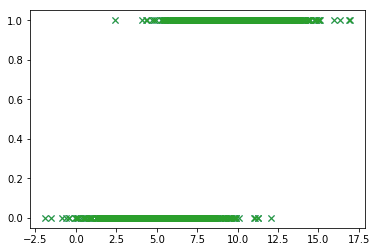

In [206]:
plt.plot(x_data, y_data, 'x')
plt.show()

In [207]:
x = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W*x + b
y_ = tf.placeholder(tf.float32, [None, 1])

In [208]:
loss = tf.reduce_mean(tf.square(y - y_))
train = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

In [209]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [210]:
smb = 100
for nstart in range(0,1000-smb, smb):
    batch_xs, batch_ys = x_data[nstart:smb+nstart].reshape((smb,1)), y_data[nstart:smb+nstart].reshape((smb,1))
    sess.run(train, feed_dict={x: batch_xs, y_: batch_ys})
    if nstart % 100 == 0:
        print(nstart, sess.run(loss),sess.run(W), sess.run(b))

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_25' with dtype float
	 [[Node: Placeholder_25 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_25', defined at:
  File "/usr/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-207-fb751d286dbd>", line 1, in <module>
    x = tf.placeholder(tf.float32, [None, 1])
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/array_ops.py", line 1587, in placeholder
    name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 2043, in _placeholder
    name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_25' with dtype float
	 [[Node: Placeholder_25 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [172]:
correct_prediction = tf.equal(tf.round(y), tf.round(y_))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [173]:
xt_1 = (np.random.normal(5, 2, 10).astype(np.float32) )
xt_2 = (np.random.normal(10, 2, 10).astype(np.float32) )
xt_c = np.concatenate((xt_1, xt_2))
yt_c = np.concatenate((np.zeros(10), np.ones(10)))
indt = np.arange(len(xt_c))
np.random.shuffle(indt)
x_test, y_test = xt_c[indt].astype(np.float32), yt_c[indt].astype(np.float32)
x_test, y_test = x_test.reshape((-1,1)), y_test.reshape((-1,1))

In [174]:
print(sess.run(accuracy, feed_dict={x: x_test,y_: y_test}))

0.0


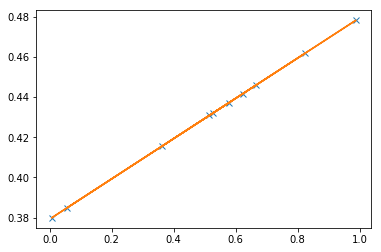

In [63]:
plt.plot(x_data, y_data, 'x')
plt.plot(x_data, x_data * sess.run(W) + sess.run(b))
plt.show()

In [70]:
np.random.normal(0,1,10).astype(np.float32)

array([-0.2418332 , -0.01121688,  0.99955881,  1.13187373,  0.03423978,
        1.93217885, -0.15313092,  0.92269611, -0.64003754,  0.34723568], dtype=float32)

In [127]:
x_data

array([ 10.43291664,   4.96533918,   8.90168476, ...,  11.91172695,
         9.99669456,  11.23473454], dtype=float32)

In [132]:
x_data[1:2+1]

array([ 4.96533918,  8.90168476], dtype=float32)